In [4]:
import tensorflow as tf;
import pandas as pd;
import numpy as np;
import pickle;
import os;
import numpy as np;
import matplotlib.pyplot as plt;

In [5]:
data=tf.keras.datasets.fashion_mnist
(train_inst,train_lab), (test_inst,test_lab) = data.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

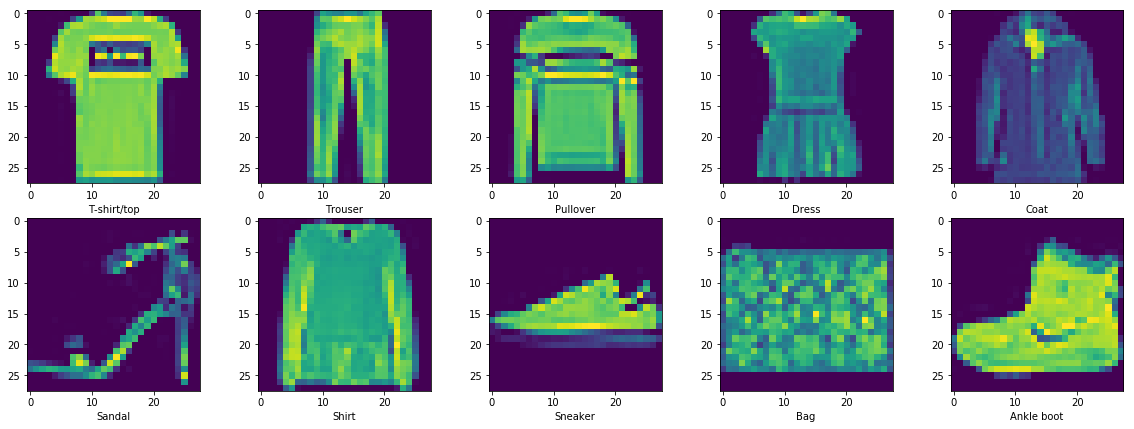

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
data,flag=dict(),np.zeros(10)
for i,j in zip(train_lab,train_inst):
  if flag[i]!=1:
    flag[i]=1;data[i]=j
  if np.sum(flag)==10:
    break
fig,ax=plt.subplots(2,5,figsize=(20,7))
it=iter(range(10))
for i in range(2):
  for j in range(5):
    label=next(it)
    ax[i,j].imshow(data[label])
    ax[i,j].set_xlabel(class_names[label])
plt.show()

In [9]:
(train_inst,test_inst)=(train_inst/255.0,test_inst/255.0)

In [18]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(32, 3, activation='relu')
        self.conv2 = tf.keras.layers.Conv2D(64, 3, activation='relu')
        self.conv3 = tf.keras.layers.Conv2D(128, 3, activation='relu')
        self.conv4 = tf.keras.layers.Conv2D(256, 3, activation='relu')
        self.max_pool=tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2)
        self.flatten = tf.keras.layers.Flatten()
        self.d1 = tf.keras.layers.Dense(128, activation='relu')
        self.d2 = tf.keras.layers.Dense(256, activation='relu')
        self.d3 = tf.keras.layers.Dense(512, activation='relu')
        self.d4 = tf.keras.layers.Dense(10)

    def net_arch(self,x):
        conv_layer1= self.max_pool(self.conv1(x))
        conv_layer2= self.max_pool(self.conv2(conv_layer1))
        conv_layer3= self.max_pool(self.conv3(conv_layer2))
        flat=self.flatten(conv_layer3)
        dense_1=self.d1(flat)
        dense_2=self.d2(dense_1)
        dense_3=self.d3(dense_2)
        return(self.d4(dense_3))
    def vis(self,model,p):
        c=0
        fig, a = plt.subplots(3,3,figsize=(8,5))
        lay_out=[layer.output for layer in model.layers[1:4]]
        models=tf.keras.Model(model.input,lay_out)
        res=models.predict(p)
        print(res[0][0].shape)
        print(type(a))
        for i in range(3):
            a[0,i].imshow(res[i][0][: , :, 1],cmap='inferno')
            a[1,i].imshow(res[i][1][: , :, 1],cmap='inferno')
            a[2,i].imshow(res[i][2][: , :, 1],cmap='inferno')

# Model Architecture

In [19]:
net_obj=MyModel()
inputs=tf.keras.Input(shape=(28,28,1))
print(inputs.shape)
a=net_obj.net_arch(inputs)
model=tf.keras.Model(inputs,a)
model.summary()

(?, 28, 28, 1)
Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 26, 26, 32)   320         input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  multiple             0           conv2d_4[0][0]                   
                                                                 conv2d_5[0][0]                   
                                                                 conv2d_6[0][0]                   
_____________________________________________________________________________

# Convolution visualisation

(26, 26, 32)
<class 'numpy.ndarray'>


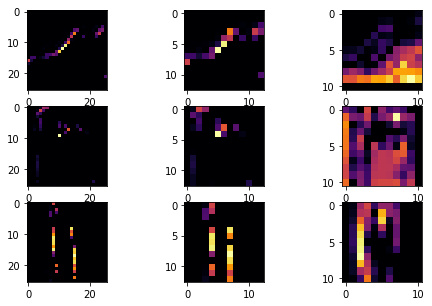

In [20]:
net_obj.vis(model,test_inst[0:3,:,:,np.newaxis])
plt.show()

# Training 

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(train_inst[:,:,:,np.newaxis],train_lab,batch_size=64,epochs=10,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 38s 801us/sample - loss: 0.2691 - acc: 0.9005 - val_loss: 0.3234 - val_acc: 0.8814
Epoch 2/10
48000/48000 [==============================] - 35s 730us/sample - loss: 0.2436 - acc: 0.9096 - val_loss: 0.2970 - val_acc: 0.8928
Epoch 3/10
48000/48000 [==============================] - 35s 727us/sample - loss: 0.2237 - acc: 0.9169 - val_loss: 0.3145 - val_acc: 0.8920
Epoch 4/10
48000/48000 [==============================] - 40s 833us/sample - loss: 0.2084 - acc: 0.9215 - val_loss: 0.3122 - val_acc: 0.8951
Epoch 5/10
48000/48000 [==============================] - 39s 821us/sample - loss: 0.1946 - acc: 0.9284 - val_loss: 0.3068 - val_acc: 0.8953
Epoch 6/10
48000/48000 [==============================] - 39s 817us/sample - loss: 0.1776 - acc: 0.9326 - val_loss: 0.3118 - val_acc: 0.8938
Epoch 7/10
48000/48000 [==============================] - 40s 826us/sample - loss: 0.1688 - acc: 0.9369 

# Initialising iterators

In [0]:
data_x=tf.data.Dataset.from_tensor_slices(train_inst[:,:,:,np.newaxis]).batch(32);
data_y=tf.data.Dataset.from_tensor_slices(lab).batch(32);
x_iter=tf.data.Dataset.make_initializable_iterator(data_x)
y_iter=tf.data.Dataset.make_initializable_iterator(data_y)
x_label=x_iter.get_next()
y_label=y_iter.get_next()

# one-hot encoding

In [ ]:
lab=np.zeros([len(train_inst),10])
for i in range(len(train_inst)):
    lab[i][train_lab[i]]=1 

In [0]:
class Model:
    def Network(self):
        self.conv1_filter = tf.Variable(tf.truncated_normal(shape=[3, 3, 1, 16], mean=0, stddev=0.08))
        self.conv2_filter = tf.Variable(tf.truncated_normal(shape=[3, 3, 16, 32], mean=0, stddev=0.08))
        self.conv1 = tf.nn.conv2d(tf.cast(x_label,dtype=tf.float32), self.conv1_filter, strides=[1,1,1,1], padding='SAME')
        self.conv1 = tf.nn.relu(self.conv1)
        self.conv1_pool = tf.nn.max_pool(self.conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
        self.conv1_bn = tf.layers.batch_normalization(self.conv1_pool)

        # 3, 4
        self.conv2 = tf.nn.conv2d(self.conv1_bn, self.conv2_filter, strides=[1,1,1,1], padding='SAME')
        self.conv2 = tf.nn.relu(self.conv2)
        self.conv2_pool = tf.nn.max_pool(self.conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')    
        self.conv2_bn = tf.layers.batch_normalization(self.conv2_pool)
        self.flat = tf.contrib.layers.flatten(self.conv2_bn)  

        # 10
        self.full1 = tf.contrib.layers.fully_connected(inputs=self.flat, num_outputs=32, activation_fn=tf.nn.relu)
        self.full1 = tf.nn.dropout(self.full1, 0.6)
        self.full1 = tf.layers.batch_normalization(self.full1)

        # 11
        self.full2 = tf.contrib.layers.fully_connected(inputs=self.full1, num_outputs=64, activation_fn=tf.nn.relu)
        self.full2 = tf.nn.dropout(self.full2, 0.7)
        self.full2 = tf.layers.batch_normalization(self.full2)
        self.out = tf.contrib.layers.fully_connected(inputs=self.full2, num_outputs=10, activation_fn=tf.nn.softmax)
        return(self.out)
    

# Training 

In [22]:
net=Model()
logits=net.Network()
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_label))
optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y_label, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')
def train_model(sess):
    accur=[]
    for i in range(int(len(train_inst)/32)):
        _,_,_,acc=sess.run([logits,cost,optimizer,accuracy])
        accur.append(acc)
        #print(len(list(tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)))) 
        return(accur)

NameError: name 'Model' is not defined

(26, 26, 32)
<class 'numpy.ndarray'>


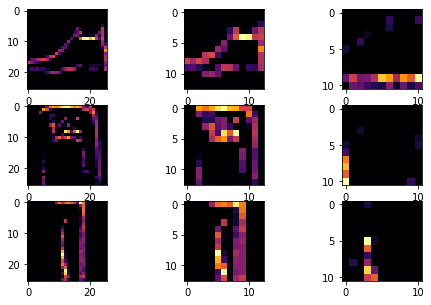

In [122]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for i in range(10):
    sess.run([x_iter.initializer,y_iter.initializer])
    print("Epoch :{} Accuracy:{}".format(i,np.mean(train_model(sess)))) 

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(train_inst[:,:,:,np.newaxis],train_lab,batch_size=64,epochs=5,validation_split=0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 44s 911us/sample - loss: 0.6047 - acc: 0.7845 - val_loss: 0.4638 - val_acc: 0.8326
Epoch 2/5
48000/48000 [==============================] - 43s 901us/sample - loss: 0.4117 - acc: 0.8496 - val_loss: 0.3885 - val_acc: 0.8570
Epoch 3/5
48000/48000 [==============================] - 43s 900us/sample - loss: 0.3547 - acc: 0.8685 - val_loss: 0.4147 - val_acc: 0.8525
Epoch 4/5
48000/48000 [==============================] - 43s 892us/sample - loss: 0.3228 - acc: 0.8818 - val_loss: 0.3583 - val_acc: 0.8683
Epoch 5/5
48000/48000 [==============================] - 42s 884us/sample - loss: 0.2998 - acc: 0.8895 - val_loss: 0.3627 - val_acc: 0.8712


(10000, 28, 1, 28)